<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/logistics/logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/logistics/train.csv
!wget https://raw.githubusercontent.com/dyjs-js/DaconStudy/main/data/logistics/test.csv
!wget https://raw.githubusercontent.com/dyjs-js/DaconStudy/main/data/logistics/sample_submission.csv

--2023-01-10 10:06:22--  https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/logistics/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1699242 (1.6M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   1.62M  --.-KB/s    in 0.02s   

2023-01-10 10:06:23 (76.0 MB/s) - ‘train.csv’ saved [1699242/1699242]

--2023-01-10 10:06:23--  https://raw.githubusercontent.com/dyjs-js/DaconStudy/main/data/logistics/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402168 (393K) [text/p

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

#데이터 살펴보기

In [69]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
smpl_sub=pd.read_csv('sample_submission.csv')

In [70]:
print(train.shape)
print(test.shape)

(31684, 5)
(7920, 4)


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   int64 
 1   송하인_격자공간고유번호  7920 non-null   int64 
 2   수하인_격자공간고유번호  7920 non-null   int64 
 3   물품_카테고리       7920 non-null   object
dtypes: int64(3), object(1)
memory usage: 247.6+ KB


In [73]:
#물품카테고리 내용 변경필요
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [74]:
test.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식


In [75]:
category_count=pd.Series(train["물품_카테고리"]).value_counts()
category_count.head()

농산물      20321
문화컨텐츠     1091
음료        1034
수산         860
가공식품       846
Name: 물품_카테고리, dtype: int64

In [76]:
#null 값 확인
train.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [77]:
test.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
dtype: int64

#데이터 전처리

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train['물품_카테고리'])

train['물품_카테고리'] = encoder.transform(train['물품_카테고리'])
test['물품_카테고리'] = encoder.transform(test['물품_카테고리'])

decribe()함수

count: 해당 column에서 비어 있지 않은 값의 개수

mean: 평균

std: 표준편차

min: 최솟값 (이상치 포함)

25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값

50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)

75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값

max: 최댓값 (이상치 포함)

In [79]:
train.describe()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,31.810409,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,16.899420,6.756473
min,0.000000,1.111000e+15,1.111000e+15,0.000000,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,27.000000,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,27.000000,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,27.000000,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,99.000000,413.000000


In [80]:
train.rename(columns={'송하인_격자공간고유번호':'consignor_Num'},inplace=True)
train.rename(columns={'수하인_격자공간고유번호':'consignee_Num'},inplace=True)
train.rename(columns={'물품_카테고리':'Category'},inplace=True)
train.rename(columns={'운송장_건수':'invoice_Num'},inplace=True)


In [81]:
test.rename(columns={'송하인_격자공간고유번호':'consignor_Num'},inplace=True)
test.rename(columns={'수하인_격자공간고유번호':'consignee_Num'},inplace=True)
test.rename(columns={'물품_카테고리':'Category'},inplace=True)

In [82]:
train.head()

,index,consignor_Num,consignee_Num,Category,invoice_Num
0,0,5011000595017300,2871000192069300,67,3
1,1,4148000690043300,5011000264024400,34,3
2,2,5011000078068400,1120000007005400,27,3
3,3,4127100048006400,5011000587019400,17,7
4,4,5011000078068400,2823700010076300,27,3


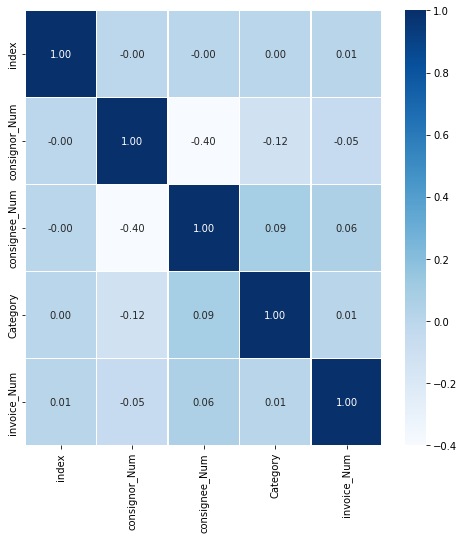

In [83]:
plt.figure(figsize=(8,8))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

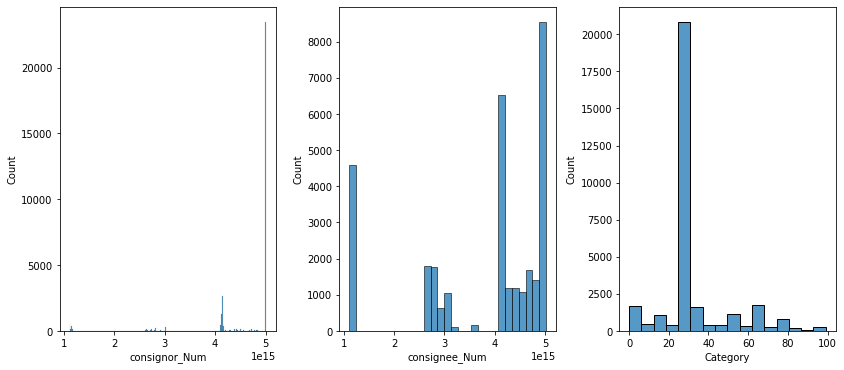

In [84]:
plt.figure(figsize=(15,15))
for i in range(1,4):
  plt.subplot(3,4,i+1)
  sns.histplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

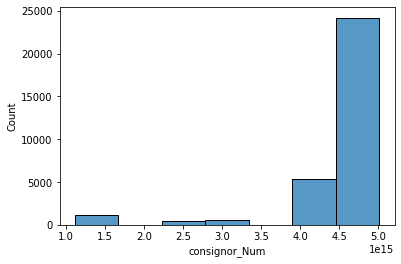

In [85]:
sns.histplot(train.iloc[:,1],bins=7)

#모델링

In [86]:
from lightgbm import LGBMRegressor
train_x=train.drop('invoice_Num', axis=1)
train_y=train['invoice_Num']

In [87]:
x_train,x_valid,y_train,y_valid=train_test_split(train_x,train_y,test_size=0.2, shuffle=True,random_state=5)

In [88]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((25347, 4), (6337, 4), (25347,), (6337,))

##Catboost

In [91]:
!pip3 install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
catboost=CatBoostRegressor()
parameters = {'n_estimators':[100,200,300,400,500], 'max_depth':[2,3,4,5,6]}

catboost_best_params = RandomizedSearchCV(catboost, parameters, cv = 5)
catboost_best_params.fit(x_train, y_train)
print(catboost_best_params.best_params_)

In [ ]:
catboost = CatBoostRegressor(n_estimators = 200, max_depth=5)
catboost.fit(x_train, y_train)
pred_catboost = catboost.predict(x_valid)
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_valid, pred_catboost))))
print('MSE : {}'.format((mean_squared_error(y_valid, pred_catboost))))
print('MAE : {}'.format((mean_absolute_error(y_valid, pred_catboost))))
#RMSE : 5.92236291682884
#MSE : 35.074382518629406
#MAE : 2.3587549602071602

##XGBOOST

In [99]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
parameters = {'n_estimaotrs':[100,200,300,400,500], 'max_depth':[2,3,4,5,6]}

xgb_best_params = RandomizedSearchCV(xgb, parameters, cv=5)
print(xgb_best_params)

xgb = XGBRegressor(n_estimators = 300)
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_valid)

print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_valid, pred_catboost))))
print('MSE : {}'.format((mean_squared_error(y_valid, pred_catboost))))
print('MAE : {}'.format((mean_absolute_error(y_valid, pred_catboost))))

#RMSE : 5.99737110055656
#MSE : 35.968460117791
#MAE : 2.3719476203707246

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6],
                                        'n_estimaotrs': [100, 200, 300, 400,
                                                         500]})
[11:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 5.99737110055656
MSE : 35.968460117791
MAE : 2.3719476203707246


1차 </br>
Catboost
XGboost 두개 다 큰 차이 없어보임

#실제 데이터로 모델링 적용

##CatBoost

In [106]:
catboost_best_params = RandomizedSearchCV(catboost, parameters, cv = 5)
catboost_best_params.fit(train_x, train_y)
print(catboost_best_params.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
314:	learn: 5.5952780	total: 1.93s	remaining: 520ms
315:	learn: 5.5925362	total: 1.94s	remaining: 516ms
316:	learn: 5.5911010	total: 1.95s	remaining: 512ms
317:	learn: 5.5833101	total: 1.96s	remaining: 506ms
318:	learn: 5.5807847	total: 1.98s	remaining: 502ms
319:	learn: 5.5797340	total: 1.99s	remaining: 497ms
320:	learn: 5.5784936	total: 2.01s	remaining: 494ms
321:	learn: 5.5760892	total: 2.02s	remaining: 489ms
322:	learn: 5.5749560	total: 2.02s	remaining: 483ms
323:	learn: 5.5746027	total: 2.03s	remaining: 476ms
324:	learn: 5.5736212	total: 2.04s	remaining: 471ms
325:	learn: 5.5723000	total: 2.05s	remaining: 466ms
326:	learn: 5.5717448	total: 2.06s	remaining: 460ms
327:	learn: 5.5697738	total: 2.06s	remaining: 453ms
328:	learn: 5.5689768	total: 2.07s	remaining: 447ms
329:	learn: 5.5678449	total: 2.07s	remaining: 440ms
330:	learn: 5.5674511	total: 2.08s	remaining: 433ms
331:	learn: 5.5608924	total: 2.08s	remaining: 427ms
332:	learn: 5.5576020	total:

In [ ]:
catboost = CatBoostRegressor(n_estimators = 200, max_depth=5)
catboost.fit(train_x, train_y)
pred_catboost = catboost.predict(test)

##XGBoost

In [108]:
xgb = XGBRegressor()
parameters = {'n_estimaotrs':[100,200,300,400,500], 'max_depth':[2,3,4,5,6]}

xgb_best_params = RandomizedSearchCV(xgb, parameters, cv=5)
print(xgb_best_params)

xgb = XGBRegressor(n_estimators = 300)
xgb.fit(train_x, train_y)
pred_xgb = xgb.predict(test)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6],
                                        'n_estimaotrs': [100, 200, 300, 400,
                                                         500]})
[12:00:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#제출

In [109]:
smpl_sub['운송장_건수']=pred_catboost+pred_xgb/2

In [110]:
smpl_sub

,index,운송장_건수
0,0,16.013053
1,1,7.482636
2,2,9.240542
3,3,6.859527
4,4,7.431821
...,...,...
7915,7915,6.608787
7916,7916,6.520504
7917,7917,6.355174
7918,7918,6.542800


In [111]:
smpl_sub.to_csv('submission.csv', index=False)